In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

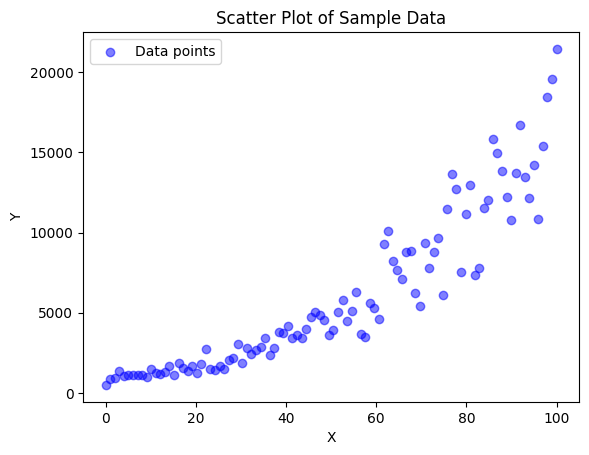

In [28]:
# Create sample data for x and y values
x = np.linspace(0, 100, 100)
y = 1.5 * np.power(x, 2) + 1000
# Add some noise to the data
y = y * np.random.normal(1, 0.2, size=x.shape)
# Plot the data
plt.scatter(x, y, label='Data points', color='blue', alpha=0.5)
plt.title('Scatter Plot of Sample Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [29]:
# Create a sample DataFrame
df = pd.DataFrame({'x': x, 'y_true': y})
df

,x,y_true
0,0.000000,494.003391
1,1.010101,833.576789
2,2.020202,940.307985
3,3.030303,1336.072997
4,4.040404,1058.321695
...,...,...
95,95.959596,10830.963972
96,96.969697,15393.412777
97,97.979798,18446.361579
98,98.989899,19573.771397


In [30]:
# Add an x^2 column to the DataFrame
df['x^2'] = df['x'] ** 2
df

,x,y_true,x^2
0,0.000000,494.003391,0.000000
1,1.010101,833.576789,1.020304
2,2.020202,940.307985,4.081216
3,3.030303,1336.072997,9.182736
4,4.040404,1058.321695,16.324865
...,...,...,...
95,95.959596,10830.963972,9208.244057
96,96.969697,15393.412777,9403.122130
97,97.979798,18446.361579,9600.040812
98,98.989899,19573.771397,9799.000102


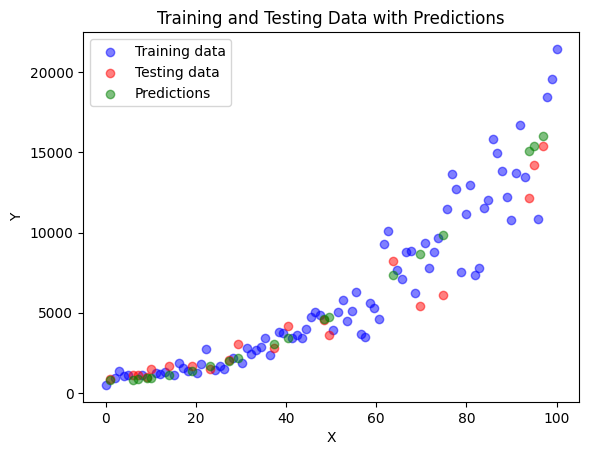

In [33]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(df[['x', 'x^2']], df['y_true'], test_size=0.2)
# Train a linear regression model
model = LinearRegression()
model.fit(x_train[["x^2"]], y_train)
# Make predictions on the test set
y_pred = model.predict(x_test[["x^2"]])
# Plot the training and testing data
plt.scatter(x_train['x'], y_train, label='Training data', color='blue', alpha=0.5)
plt.scatter(x_test['x'], y_test, label='Testing data', color='red', alpha=0.5)
plt.scatter(x_test['x'], y_pred, label='Predictions', color='green', alpha=0.5)
plt.title('Training and Testing Data with Predictions')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


In [34]:
# Score the model
r2 = r2_score(y_test, y_pred)
print(f'R^2 score: {r2:.4f}')

R^2 score: 0.8976


In [ ]:
# Inspect the model coefficients
model.coef_, model.intercept_

(array([1.62486086]), np.float64(768.5410149110312))